# E-commerce Customer Service Chatbot - Text Preprocessing Pipeline
### This notebook implements a comprehensive preprocessing pipeline for customer service messages with special attention to preserving emotional intensity while normalizing text.

In [1]:
!pip install emoji

# Import necessary libraries

In [2]:
import re
import pandas as pd
import nltk
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True


# Create sample dataset

In [3]:
data = {
    'text': [
        "Hey, can u plz tell me where's my order??",
        "i didn't receive my parcel yet!!!!",
        "Whr's my ordr 😡😡",
        "delivery late af... i want refund now",
        "HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATELY!!!",
        "thx for the quick delivery, package arrived in perfect condition 👍",
        "order #AB-12345 not matching what i ordered, can u help me?",
        "omg i love your products so much 😍😍😍"
    ]
}

df = pd.DataFrame(data)
print("Original dataset:")
display(df)

Original dataset:


,text
0,"Hey, can u plz tell me where's my order??"
1,i didn't receive my parcel yet!!!!
2,Whr's my ordr 😡😡
3,delivery late af... i want refund now
4,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...
5,"thx for the quick delivery, package arrived in..."
6,"order #AB-12345 not matching what i ordered, c..."
7,omg i love your products so much 😍😍😍


# Emoji Processing
### Extract and process emojis FIRST to preserve emotional content


In [4]:
# Define emoji mapping
emoji_map = {
    '😠': 'angry',
    '😡': 'angry',
    '🤬': 'angry',
    '😤': 'frustrated',
    '😒': 'annoyed',
    '😑': 'annoyed',
    '😞': 'disappointed',
    '😔': 'disappointed',
    '😟': 'worried',
    '😢': 'sad',
    '😭': 'sad',
    '😩': 'distressed',
    '😫': 'distressed',
    '🙁': 'sad',
    '☹️': 'sad',
    '😕': 'confused',
    '❓': 'question',
    '❔': 'question',
    '❗': 'exclamation',
    '❕': 'exclamation',
    '⁉️': 'exclamation_question',
    '‼️': 'double_exclamation',
    '👍': 'thumbs_up',
    '👎': 'thumbs_down',
    '🙏': 'please',
    '🤔': 'thinking',
    '😊': 'happy',
    '😀': 'happy',
    '😁': 'happy',
    '😃': 'happy',
    '😄': 'happy',
    '🙂': 'happy',
    '😉': 'happy',
    '🤗': 'happy',
    '😋': 'happy',
    '😎': 'cool',
    '🤩': 'excited',
    '😍': 'love',
    '❤️': 'love',
    '💔': 'heartbroken',
    '⏰': 'time',
    '⌚': 'time',
    '🕒': 'time',
    '📦': 'package',
    '🚚': 'delivery',
    '💰': 'money',
    '💵': 'money',
    '💸': 'money',
}

def process_emojis(text):
    """
    Process emojis in text BEFORE other normalization steps:
    - Extract emoji features
    - Replace emojis with text equivalents
    """
    emoji_features = {
        'emoji_count': 0,
        'angry_emoji_count': 0,
        'sad_emoji_count': 0,
        'happy_emoji_count': 0,
        'emoji_sentiment': 0
    }

    processed_text = text
    for char in text:
        if char in emoji.EMOJI_DATA:
            emoji_features['emoji_count'] += 1

            # Categorize emoji sentiment
            if char in emoji_map:
                emotion = emoji_map[char]
                if emotion in ['angry', 'frustrated', 'annoyed']:
                    emoji_features['angry_emoji_count'] += 1
                    emoji_features['emoji_sentiment'] -= 1
                elif emotion in ['sad', 'disappointed', 'heartbroken', 'distressed']:
                    emoji_features['sad_emoji_count'] += 1
                    emoji_features['emoji_sentiment'] -= 0.5
                elif emotion in ['happy', 'excited', 'love', 'thumbs_up']:
                    emoji_features['happy_emoji_count'] += 1
                    emoji_features['emoji_sentiment'] += 1

            # Replace emoji with text equivalent
            emoji_text = f"[{emoji_map.get(char, 'emoji')}]" if char in emoji_map else "[emoji]"
            processed_text = processed_text.replace(char, f" {emoji_text} ")

    # Cleanup resulting text
    processed_text = re.sub(r'\s+', ' ', processed_text)

    return processed_text, emoji_features

# Apply emoji processing FIRST
emoji_results = df['text'].apply(process_emojis)
df['emoji_processed_text'] = [result[0] for result in emoji_results]

# Extract emoji features
for feature in ['emoji_count', 'angry_emoji_count', 'sad_emoji_count', 'happy_emoji_count', 'emoji_sentiment']:
    df[feature] = [result[1][feature] for result in emoji_results]

print("\nAfter Emoji Processing (FIRST step):")
display(df)


After Emoji Processing (FIRST step):


,text,emoji_processed_text,emoji_count,angry_emoji_count,sad_emoji_count,happy_emoji_count,emoji_sentiment
0,"Hey, can u plz tell me where's my order??","Hey, can u plz tell me where's my order??",0,0,0,0,0
1,i didn't receive my parcel yet!!!!,i didn't receive my parcel yet!!!!,0,0,0,0,0
2,Whr's my ordr 😡😡,Whr's my ordr [angry] [angry],2,2,0,0,-2
3,delivery late af... i want refund now,delivery late af... i want refund now,0,0,0,0,0
4,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...,0,0,0,0,0
5,"thx for the quick delivery, package arrived in...","thx for the quick delivery, package arrived in...",1,0,0,1,1
6,"order #AB-12345 not matching what i ordered, c...","order #AB-12345 not matching what i ordered, c...",0,0,0,0,0
7,omg i love your products so much 😍😍😍,omg i love your products so much [love] [love]...,3,0,0,3,3


# Text Normalization
## Step 2: Lowercase, standardize punctuation and whitespace

In [5]:
def normalize_text(text):
    """
    Basic text normalization:
    - Convert to lowercase
    - Replace multiple punctuation with single
    - Standardize whitespace
    """
    # Convert to lowercase
    text = text.lower()

    # Replace multiple punctuation with single
    text = re.sub(r'([!?.])\1+', r'\1', text)

    # Standardize whitespace
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

# Apply normalization to emoji-processed text
df['normalized_text'] = df['emoji_processed_text'].apply(normalize_text)

print("\nAfter Text Normalization:")
display(df)


After Text Normalization:


,text,emoji_processed_text,emoji_count,angry_emoji_count,sad_emoji_count,happy_emoji_count,emoji_sentiment,normalized_text
0,"Hey, can u plz tell me where's my order??","Hey, can u plz tell me where's my order??",0,0,0,0,0,"hey, can u plz tell me where's my order?"
1,i didn't receive my parcel yet!!!!,i didn't receive my parcel yet!!!!,0,0,0,0,0,i didn't receive my parcel yet!
2,Whr's my ordr 😡😡,Whr's my ordr [angry] [angry],2,2,0,0,-2,whr's my ordr [angry] [angry]
3,delivery late af... i want refund now,delivery late af... i want refund now,0,0,0,0,0,delivery late af. i want refund now
4,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...,0,0,0,0,0,hello is anyone there? i need help immediately!
5,"thx for the quick delivery, package arrived in...","thx for the quick delivery, package arrived in...",1,0,0,1,1,"thx for the quick delivery, package arrived in..."
6,"order #AB-12345 not matching what i ordered, c...","order #AB-12345 not matching what i ordered, c...",0,0,0,0,0,"order #ab-12345 not matching what i ordered, c..."
7,omg i love your products so much 😍😍😍,omg i love your products so much [love] [love]...,3,0,0,3,3,omg i love your products so much [love] [love]...


# Text Cleaning
## Step 3: Remove URLs, emails, standardize order IDs

In [6]:
def clean_text(text):
    """
    Advanced text cleaning:
    - Remove URLs
    - Remove email addresses
    - Standardize order IDs
    - Handle special characters but preserve apostrophes and emoji placeholders in []
    """
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Standardize order IDs (typically alphanumeric with hyphens)
    text = re.sub(r'\b[A-Za-z0-9]{2,4}-[A-Za-z0-9]{6,10}\b', ' orderid ', text)

    # Handle special characters but preserve apostrophes and [emotion] tags
    # Modified to preserve square brackets for emoji replacement tokens
    text = re.sub(r'[^\w\s\'\[\]]', ' ', text)

    # Remove unnecessary whitespace
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

# Apply cleaning
df['cleaned_text'] = df['normalized_text'].apply(clean_text)

print("\nAfter Text Cleaning:")
display(df)


After Text Cleaning:


,text,emoji_processed_text,emoji_count,angry_emoji_count,sad_emoji_count,happy_emoji_count,emoji_sentiment,normalized_text,cleaned_text
0,"Hey, can u plz tell me where's my order??","Hey, can u plz tell me where's my order??",0,0,0,0,0,"hey, can u plz tell me where's my order?",hey can u plz tell me where's my order
1,i didn't receive my parcel yet!!!!,i didn't receive my parcel yet!!!!,0,0,0,0,0,i didn't receive my parcel yet!,i didn't receive my parcel yet
2,Whr's my ordr 😡😡,Whr's my ordr [angry] [angry],2,2,0,0,-2,whr's my ordr [angry] [angry],whr's my ordr [angry] [angry]
3,delivery late af... i want refund now,delivery late af... i want refund now,0,0,0,0,0,delivery late af. i want refund now,delivery late af i want refund now
4,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...,0,0,0,0,0,hello is anyone there? i need help immediately!,hello is anyone there i need help immediately
5,"thx for the quick delivery, package arrived in...","thx for the quick delivery, package arrived in...",1,0,0,1,1,"thx for the quick delivery, package arrived in...",thx for the quick delivery package arrived in ...
6,"order #AB-12345 not matching what i ordered, c...","order #AB-12345 not matching what i ordered, c...",0,0,0,0,0,"order #ab-12345 not matching what i ordered, c...",order ab 12345 not matching what i ordered can...
7,omg i love your products so much 😍😍😍,omg i love your products so much [love] [love]...,3,0,0,3,3,omg i love your products so much [love] [love]...,omg i love your products so much [love] [love]...


# Text Standardization
## Step 4: Expand abbreviations and correct misspellings

In [7]:
# Define abbreviation and misspelling dictionaries
abbrev_dict = {
    'u': 'you',
    'ur': 'your',
    'plz': 'please',
    'pls': 'please',
    'whr': 'where',
    'w/': 'with',
    'hv': 'have',
    'tq': 'thank you',
    'ty': 'thank you',
    'thx': 'thanks',
    'asap': 'as soon as possible',
    'af': 'very',
    'rn': 'right now',
    'tbh': 'to be honest',
    'lmk': 'let me know',
    'idk': 'i do not know',
    'fyi': 'for your information',
    'bc': 'because',
    'cuz': 'because',
    'cos': 'because',
    'b4': 'before',
    'yr': 'your',
    'yrs': 'years',
    'mins': 'minutes',
    'hrs': 'hours',
    'msg': 'message',
    'convo': 'conversation',
    'info': 'information',
    'btw': 'by the way',
    'imo': 'in my opinion',
    'tmrw': 'tomorrow',
    'tho': 'though',
    'sry': 'sorry',
    'lol': 'laughing',
    'omg': 'oh my god',
    'wtf': 'what the heck',
}

misspell_dict = {
    'ordr': 'order',
    'delivry': 'delivery',
    'pakage': 'package',
    'pacel': 'parcel',
    'passel': 'parcel',
    'recieve': 'receive',
    'recieved': 'received',
    'recieving': 'receiving',
    'shippin': 'shipping',
    'shiping': 'shipping',
    'refund': 'refund',
    'warrenty': 'warranty',
    'waranty': 'warranty',
    'traking': 'tracking',
    'adress': 'address',
    'addres': 'address',
    'acount': 'account',
    'problm': 'problem',
    'purchas': 'purchase',
    'recept': 'receipt',
}

def standardize_text(text):
    """
    Expand abbreviations and correct misspellings
    """
    words = text.split()
    result = []

    for word in words:
        # Check if word is in abbreviation dictionary
        if word in abbrev_dict:
            result.append(abbrev_dict[word])
        # Check if word is in misspelling dictionary
        elif word in misspell_dict:
            result.append(misspell_dict[word])
        else:
            result.append(word)

    return ' '.join(result)

# Apply standardization
df['standardized_text'] = df['cleaned_text'].apply(standardize_text)

print("\nAfter Text Standardization:")
display(df)


After Text Standardization:


,text,emoji_processed_text,emoji_count,angry_emoji_count,sad_emoji_count,happy_emoji_count,emoji_sentiment,normalized_text,cleaned_text,standardized_text
0,"Hey, can u plz tell me where's my order??","Hey, can u plz tell me where's my order??",0,0,0,0,0,"hey, can u plz tell me where's my order?",hey can u plz tell me where's my order,hey can you please tell me where's my order
1,i didn't receive my parcel yet!!!!,i didn't receive my parcel yet!!!!,0,0,0,0,0,i didn't receive my parcel yet!,i didn't receive my parcel yet,i didn't receive my parcel yet
2,Whr's my ordr 😡😡,Whr's my ordr [angry] [angry],2,2,0,0,-2,whr's my ordr [angry] [angry],whr's my ordr [angry] [angry],whr's my order [angry] [angry]
3,delivery late af... i want refund now,delivery late af... i want refund now,0,0,0,0,0,delivery late af. i want refund now,delivery late af i want refund now,delivery late very i want refund now
4,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...,0,0,0,0,0,hello is anyone there? i need help immediately!,hello is anyone there i need help immediately,hello is anyone there i need help immediately
5,"thx for the quick delivery, package arrived in...","thx for the quick delivery, package arrived in...",1,0,0,1,1,"thx for the quick delivery, package arrived in...",thx for the quick delivery package arrived in ...,thanks for the quick delivery package arrived ...
6,"order #AB-12345 not matching what i ordered, c...","order #AB-12345 not matching what i ordered, c...",0,0,0,0,0,"order #ab-12345 not matching what i ordered, c...",order ab 12345 not matching what i ordered can...,order ab 12345 not matching what i ordered can...
7,omg i love your products so much 😍😍😍,omg i love your products so much [love] [love]...,3,0,0,3,3,omg i love your products so much [love] [love]...,omg i love your products so much [love] [love]...,oh my god i love your products so much [love] ...


# Emotional Intensity Extraction
## Step 5: Extract features related to emotional intensity

In [8]:
def extract_emotional_features(text):
    """
    Extract features related to emotional intensity:
    - ALL CAPS ratio
    - Exclamation/question mark counts
    - Urgent words count
    """
    features = {
        'all_caps_ratio': 0,
        'exclamation_count': 0,
        'question_count': 0,
        'urgent_words_count': 0,
    }

    # Count uppercase words (excluding single letters which might be acronyms)
    uppercase_words = [word for word in re.findall(r'\b[A-Z]{2,}\b', text)]
    word_count = len(text.split())
    if word_count > 0:
        features['all_caps_ratio'] = len(uppercase_words) / word_count

    # Count exclamations and questions
    features['exclamation_count'] = text.count('!')
    features['question_count'] = text.count('?')

    # Count urgent words
    urgent_words = ['urgent', 'immediately', 'asap', 'now', 'hurry', 'fast', 'quick']
    for word in text.lower().split():
        if word in urgent_words:
            features['urgent_words_count'] += 1

    return features

# Apply emotional feature extraction to original text (before normalization)
emotion_results = df['text'].apply(extract_emotional_features)

# Extract emotional features
for feature in ['all_caps_ratio', 'exclamation_count', 'question_count', 'urgent_words_count']:
    df[feature] = [result[feature] for result in emotion_results]

print("\nAfter Emotional Feature Extraction:")
display(df)


After Emotional Feature Extraction:


,text,emoji_processed_text,emoji_count,angry_emoji_count,sad_emoji_count,happy_emoji_count,emoji_sentiment,normalized_text,cleaned_text,standardized_text,all_caps_ratio,exclamation_count,question_count,urgent_words_count
0,"Hey, can u plz tell me where's my order??","Hey, can u plz tell me where's my order??",0,0,0,0,0,"hey, can u plz tell me where's my order?",hey can u plz tell me where's my order,hey can you please tell me where's my order,0.000000,0,2,0
1,i didn't receive my parcel yet!!!!,i didn't receive my parcel yet!!!!,0,0,0,0,0,i didn't receive my parcel yet!,i didn't receive my parcel yet,i didn't receive my parcel yet,0.000000,4,0,0
2,Whr's my ordr 😡😡,Whr's my ordr [angry] [angry],2,2,0,0,-2,whr's my ordr [angry] [angry],whr's my ordr [angry] [angry],whr's my order [angry] [angry],0.000000,0,0,0
3,delivery late af... i want refund now,delivery late af... i want refund now,0,0,0,0,0,delivery late af. i want refund now,delivery late af i want refund now,delivery late very i want refund now,0.000000,0,0,1
4,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...,0,0,0,0,0,hello is anyone there? i need help immediately!,hello is anyone there i need help immediately,hello is anyone there i need help immediately,0.875000,3,3,0
5,"thx for the quick delivery, package arrived in...","thx for the quick delivery, package arrived in...",1,0,0,1,1,"thx for the quick delivery, package arrived in...",thx for the quick delivery package arrived in ...,thanks for the quick delivery package arrived ...,0.000000,0,0,1
6,"order #AB-12345 not matching what i ordered, c...","order #AB-12345 not matching what i ordered, c...",0,0,0,0,0,"order #ab-12345 not matching what i ordered, c...",order ab 12345 not matching what i ordered can...,order ab 12345 not matching what i ordered can...,0.090909,0,1,0
7,omg i love your products so much 😍😍😍,omg i love your products so much [love] [love]...,3,0,0,3,3,omg i love your products so much [love] [love]...,omg i love your products so much [love] [love]...,oh my god i love your products so much [love] ...,0.000000,0,0,0


# Sentiment Analysis
## Step 6: Add sentiment analysis

In [9]:
def get_sentiment_score(text):
    """Get sentiment analysis score using TextBlob"""
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
df['sentiment_score'] = df['emoji_processed_text'].apply(get_sentiment_score)

# Calculate a combined emotional intensity score
# Weights can be adjusted based on importance
def calculate_emotional_intensity(row):
    return (
        (0.4 * row['all_caps_ratio']) +
        (0.15 * row['exclamation_count']) +
        (0.1 * row['question_count']) +
        (0.15 * row['urgent_words_count']) +
        (0.2 * abs(row['sentiment_score'])) +
        (0.1 * row['emoji_count']) +
        (0.2 * row['angry_emoji_count'])
    )

df['emotional_intensity'] = df.apply(calculate_emotional_intensity, axis=1)

print("\nAfter Sentiment Analysis and Emotional Intensity Calculation:")
display(df)


After Sentiment Analysis and Emotional Intensity Calculation:


,text,emoji_processed_text,emoji_count,angry_emoji_count,sad_emoji_count,happy_emoji_count,emoji_sentiment,normalized_text,cleaned_text,standardized_text,all_caps_ratio,exclamation_count,question_count,urgent_words_count,sentiment_score,emotional_intensity
0,"Hey, can u plz tell me where's my order??","Hey, can u plz tell me where's my order??",0,0,0,0,0,"hey, can u plz tell me where's my order?",hey can u plz tell me where's my order,hey can you please tell me where's my order,0.000000,0,2,0,0.000000,0.200000
1,i didn't receive my parcel yet!!!!,i didn't receive my parcel yet!!!!,0,0,0,0,0,i didn't receive my parcel yet!,i didn't receive my parcel yet,i didn't receive my parcel yet,0.000000,4,0,0,0.000000,0.600000
2,Whr's my ordr 😡😡,Whr's my ordr [angry] [angry],2,2,0,0,-2,whr's my ordr [angry] [angry],whr's my ordr [angry] [angry],whr's my order [angry] [angry],0.000000,0,0,0,-0.500000,0.700000
3,delivery late af... i want refund now,delivery late af... i want refund now,0,0,0,0,0,delivery late af. i want refund now,delivery late af i want refund now,delivery late very i want refund now,0.000000,0,0,1,-0.300000,0.210000
4,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...,0,0,0,0,0,hello is anyone there? i need help immediately!,hello is anyone there i need help immediately,hello is anyone there i need help immediately,0.875000,3,3,0,0.000000,1.100000
5,"thx for the quick delivery, package arrived in...","thx for the quick delivery, package arrived in...",1,0,0,1,1,"thx for the quick delivery, package arrived in...",thx for the quick delivery package arrived in ...,thanks for the quick delivery package arrived ...,0.000000,0,0,1,0.666667,0.383333
6,"order #AB-12345 not matching what i ordered, c...","order #AB-12345 not matching what i ordered, c...",0,0,0,0,0,"order #ab-12345 not matching what i ordered, c...",order ab 12345 not matching what i ordered can...,order ab 12345 not matching what i ordered can...,0.090909,0,1,0,0.000000,0.136364
7,omg i love your products so much 😍😍😍,omg i love your products so much [love] [love]...,3,0,0,3,3,omg i love your products so much [love] [love]...,omg i love your products so much [love] [love]...,oh my god i love your products so much [love] ...,0.000000,0,0,0,0.500000,0.400000


# Final preprocessing pipeline
## Combine all steps into a single function in the correct order

In [10]:
def preprocess_text(text, preserve_emotion=True):
    """
    Complete preprocessing pipeline that returns both normalized text
    and emotional features if preserve_emotion=True
    """
    # Store original for emotional feature extraction
    original_text = text

    # Extract emotional features from original text
    emotion_features = extract_emotional_features(original_text)

    # Process emojis FIRST
    text, emoji_features = process_emojis(text)

    # Basic normalization
    text = normalize_text(text)

    # Clean text
    text = clean_text(text)

    # Standardize text (expand abbreviations, correct misspellings)
    text = standardize_text(text)

    # Get sentiment score
    sentiment_score = get_sentiment_score(text)

    # Combine all features if preserving emotion
    if preserve_emotion:
        return {
            'normalized_text': text,
            'emotional_features': {
                **emotion_features,
                **emoji_features,
                'sentiment_score': sentiment_score
            }
        }
    else:
        return text

# Apply the complete pipeline to the dataset
complete_results = df['text'].apply(preprocess_text)

# Extract normalized text
df['final_normalized_text'] = [result['normalized_text'] for result in complete_results]

print("\nFinal Preprocessing Results:")
# Display only original text and final normalized text for clarity
display(df[['text', 'final_normalized_text', 'emotional_intensity']])


Final Preprocessing Results:


,text,final_normalized_text,emotional_intensity
0,"Hey, can u plz tell me where's my order??",hey can you please tell me where's my order,0.200000
1,i didn't receive my parcel yet!!!!,i didn't receive my parcel yet,0.600000
2,Whr's my ordr 😡😡,whr's my order [angry] [angry],0.700000
3,delivery late af... i want refund now,delivery late very i want refund now,0.210000
4,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...,hello is anyone there i need help immediately,1.100000
5,"thx for the quick delivery, package arrived in...",thanks for the quick delivery package arrived ...,0.383333
6,"order #AB-12345 not matching what i ordered, c...",order ab 12345 not matching what i ordered can...,0.136364
7,omg i love your products so much 😍😍😍,oh my god i love your products so much [love] ...,0.400000


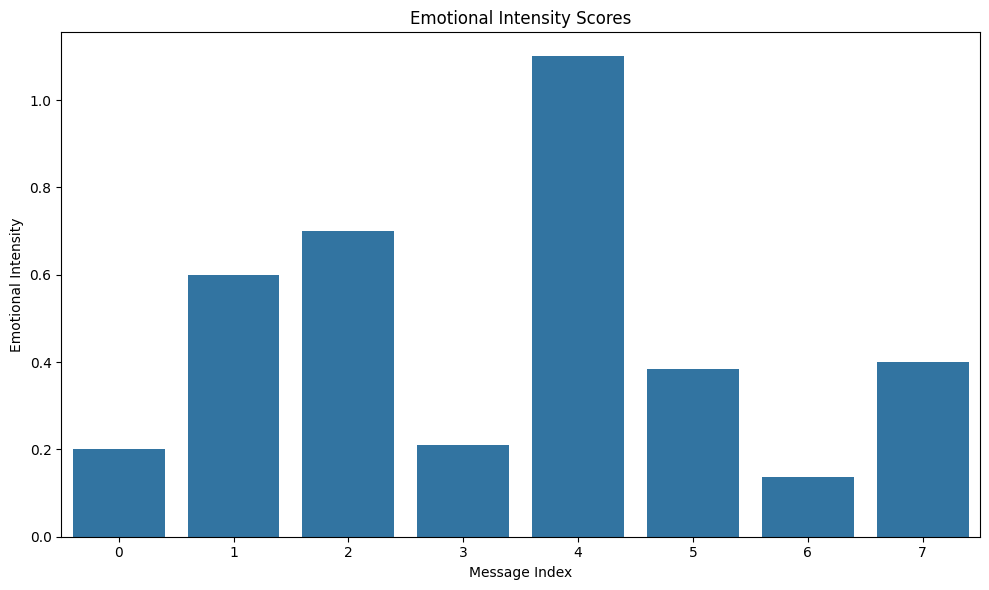

In [11]:
# Cell 10: Visualization of emotional features
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y='emotional_intensity', data=df)
plt.title('Emotional Intensity Scores')
plt.xlabel('Message Index')
plt.ylabel('Emotional Intensity')
plt.xticks(df.index, df.index)
plt.tight_layout()
plt.show()

In [ ]:
class CustomerServicePreprocessor:
    def __init__(self):
        self.abbrev_dict = abbrev_dict
        self.misspell_dict = misspell_dict
        self.emoji_map = emoji_map

    def preprocess(self, text, preserve_emotion=True):
        """
        Complete preprocessing pipeline in the correct order:
        1. Extract emotional features from original text
        2. Process emojis FIRST
        3. Normalize text (lowercase, punctuation)
        4. Clean text (URLs, emails, special chars)
        5. Standardize text (expand abbreviations, correct misspellings)
        6. Calculate sentiment scores
        """
        # Store original for emotional feature extraction
        original_text = text

        # Extract emotional features from original text
        emotion_features = extract_emotional_features(original_text)

        # Process emojis FIRST
        text, emoji_features = process_emojis(text)

        # Basic normalization
        text = normalize_text(text)

        # Clean text
        text = clean_text(text)

        # Standardize text
        text = standardize_text(text)

        # Get sentiment score
        sentiment_score = get_sentiment_score(text)

        # Combine all features if preserving emotion
        if preserve_emotion:
            return {
                'normalized_text': text,
                'emotional_features': {
                    **emotion_features,
                    'sentiment_score': sentiment_score
                }
            }
        else:
            return text

    def preprocess_dataset(self, df, text_column='text'):
        """Preprocess an entire dataset"""
        results = df[text_column].apply(self.preprocess)

        # Add normalized text as a new column
        df['normalized_text'] = [r['normalized_text'] for r in results]

        # Add emotional feature columns
        if results[0]['emotional_features']:
            for feature in results[0]['emotional_features']:
                df[f'emotion_{feature}'] = [r['emotional_features'][feature] for r in results]

        return df

# Demonstration of using the class
processor = CustomerServicePreprocessor()
processed_df = processor.preprocess_dataset(df)

print("\nFinal Dataset using Preprocessor Class:")
display(processed_df)


Final Dataset using Preprocessor Class:


,text,emoji_processed_text,emoji_count,angry_emoji_count,sad_emoji_count,happy_emoji_count,emoji_sentiment,normalized_text,cleaned_text,standardized_text,...,question_count,urgent_words_count,sentiment_score,emotional_intensity,final_normalized_text,emotion_all_caps_ratio,emotion_exclamation_count,emotion_question_count,emotion_urgent_words_count,emotion_sentiment_score
0,"Hey, can u plz tell me where's my order??","Hey, can u plz tell me where's my order??",0,0,0,0,0,hey can you please tell me where's my order,hey can u plz tell me where's my order,hey can you please tell me where's my order,...,2,0,0.000000,0.200000,hey can you please tell me where's my order,0.000000,0,2,0,0.000000
1,i didn't receive my parcel yet!!!!,i didn't receive my parcel yet!!!!,0,0,0,0,0,i didn't receive my parcel yet,i didn't receive my parcel yet,i didn't receive my parcel yet,...,0,0,0.000000,0.600000,i didn't receive my parcel yet,0.000000,4,0,0,0.000000
2,Whr's my ordr 😡😡,Whr's my ordr [angry] [angry],2,2,0,0,-2,whr's my order [angry] [angry],whr's my ordr [angry] [angry],whr's my order [angry] [angry],...,0,0,-0.500000,0.700000,whr's my order [angry] [angry],0.000000,0,0,0,-0.500000
3,delivery late af... i want refund now,delivery late af... i want refund now,0,0,0,0,0,delivery late very i want refund now,delivery late af i want refund now,delivery late very i want refund now,...,0,1,-0.300000,0.210000,delivery late very i want refund now,0.000000,0,0,1,-0.050000
4,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...,HELLO IS ANYONE THERE??? I NEED HELP IMMEDIATE...,0,0,0,0,0,hello is anyone there i need help immediately,hello is anyone there i need help immediately,hello is anyone there i need help immediately,...,3,0,0.000000,1.100000,hello is anyone there i need help immediately,0.875000,3,3,0,0.000000
5,"thx for the quick delivery, package arrived in...","thx for the quick delivery, package arrived in...",1,0,0,1,1,thanks for the quick delivery package arrived ...,thx for the quick delivery package arrived in ...,thanks for the quick delivery package arrived ...,...,0,1,0.666667,0.383333,thanks for the quick delivery package arrived ...,0.000000,0,0,1,0.511111
6,"order #AB-12345 not matching what i ordered, c...","order #AB-12345 not matching what i ordered, c...",0,0,0,0,0,order ab 12345 not matching what i ordered can...,order ab 12345 not matching what i ordered can...,order ab 12345 not matching what i ordered can...,...,1,0,0.000000,0.136364,order ab 12345 not matching what i ordered can...,0.090909,0,1,0,0.000000
7,omg i love your products so much 😍😍😍,omg i love your products so much [love] [love]...,3,0,0,3,3,oh my god i love your products so much [love] ...,omg i love your products so much [love] [love]...,oh my god i love your products so much [love] ...,...,0,0,0.500000,0.400000,oh my god i love your products so much [love] ...,0.000000,0,0,0,0.500000
